In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data=pd.read_csv(r"C:\Users\buvan\HealthInsurance.csv")
pd.options.display.float_format = '{:.2f}'.format

In [3]:
data.head()

,Unnamed: 0,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.90,0,yes,southwest,1388278.45
1,1,18,male,33.77,1,no,southeast,141874.91
2,2,28,male,33.00,3,no,southeast,365834.77
3,3,33,male,22.70,0,no,northwest,1807563.17
4,4,32,male,28.88,0,no,northwest,317932.83


In [4]:
data.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [5]:
data.shape

(1338, 7)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
data['region'].value_counts().sort_values()

northeast    324
southwest    325
northwest    325
southeast    364
Name: region, dtype: int64

In [9]:
data['children'].value_counts().sort_values()

5     18
4     25
3    157
2    240
1    324
0    574
Name: children, dtype: int64

In [10]:
data.describe()

,age,bmi,children,charges
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,1091094.12
std,14.05,6.10,1.21,995685.12
min,18.00,15.96,0.00,92240.47
25%,27.00,26.30,0.00,389746.41
50%,39.00,30.40,1.00,771390.75
75%,51.00,34.69,2.00,1368133.61
max,64.00,53.13,5.00,5243204.59


In [11]:
data['sex'].unique()
data['sex']=data['sex'].map({'female':0,'male':1})
data['smoker']=data['smoker'].map({'yes':1,'no':0})
data['region']=data['region'].map({'southwest':1,'southeast':2,
                   'northwest':3,'northeast':4})

In [12]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,1,1388278.45
1,18,1,33.77,1,0,2,141874.91
2,28,1,33.00,3,0,2,365834.77
3,33,1,22.70,0,0,3,1807563.17
4,32,1,28.88,0,0,3,317932.83


In [13]:
abs(data.drop('charges',axis=1).corrwith(data['charges']))

age        0.30
sex        0.06
bmi        0.20
children   0.07
smoker     0.79
region     0.01
dtype: float64

<AxesSubplot:title={'center':'correlation with charges'}>

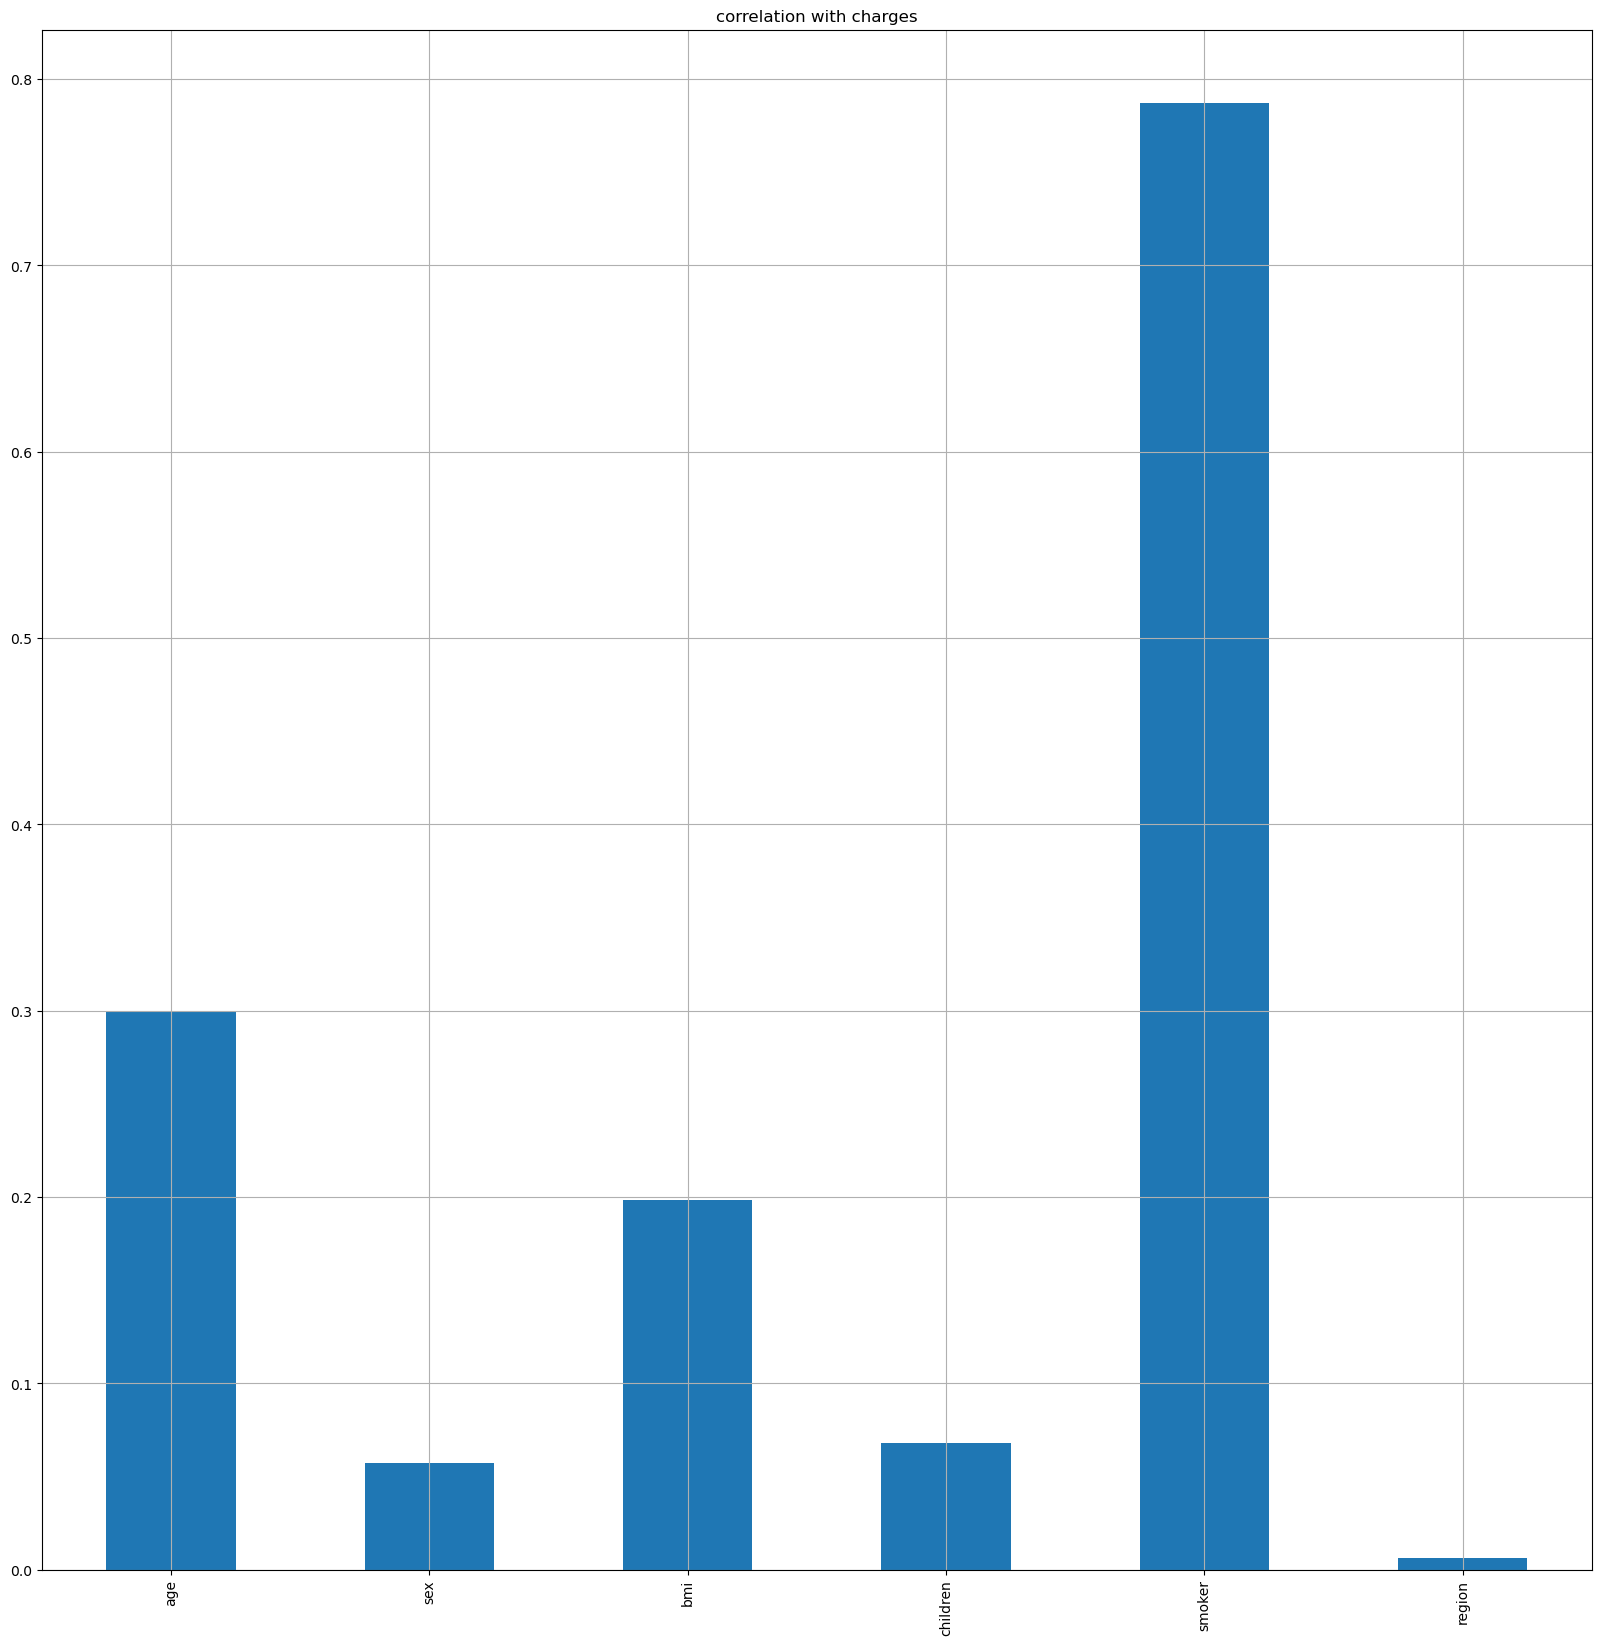

In [14]:
data.drop('charges',axis=1).corrwith(data['charges']).plot(kind='bar',grid=True,figsize=(20,20),title='correlation with charges')

<AxesSubplot:title={'center':'Age vs Charge'}, xlabel='age', ylabel='charges'>

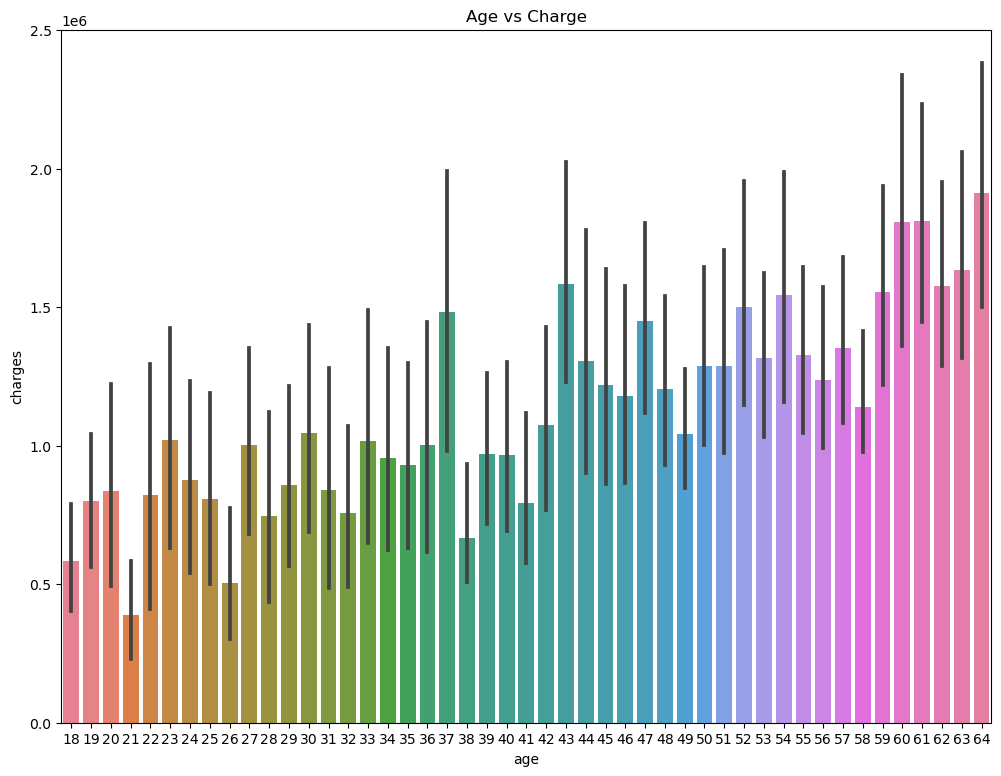

In [15]:
plt.figure(figsize=(12,9))
plt.title('Age vs Charge')
sns.barplot(x='age',y='charges',data=data,palette='husl')

Text(0.5, 1.0, 'BMI VS Charge')

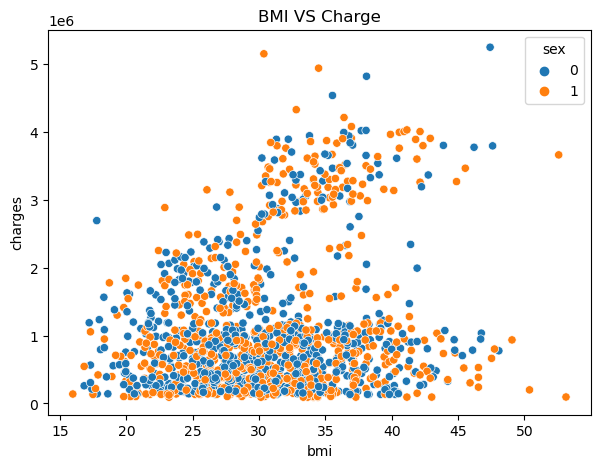

In [16]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='bmi',y='charges',hue='sex',data=data)
plt.title('BMI VS Charge')

<AxesSubplot:title={'center':'Smoker vs Charge'}, xlabel='smoker', ylabel='charges'>

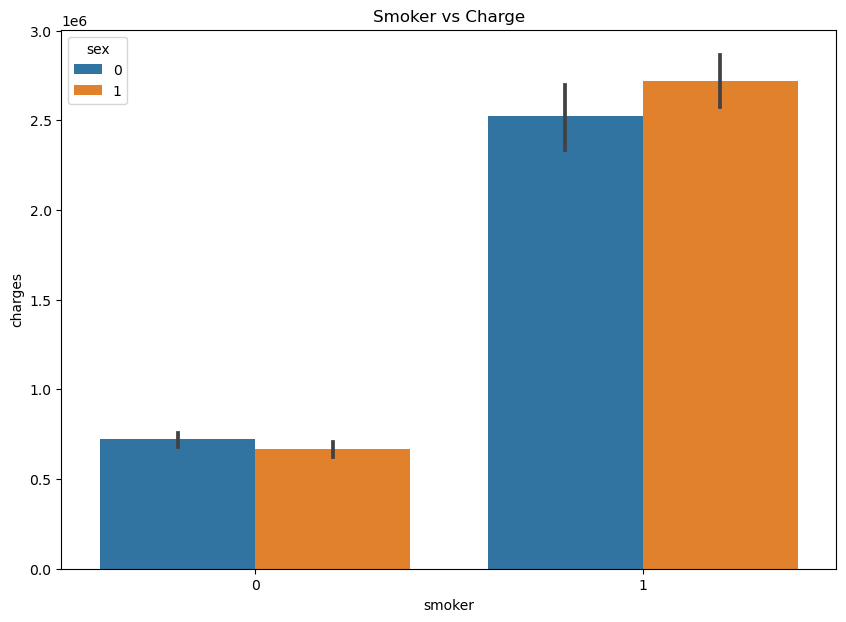

In [17]:
plt.figure(figsize=(10,7))
plt.title('Smoker vs Charge')
sns.barplot(x='smoker',y='charges',data=data,hue='sex')

In [18]:
X = data.drop(['charges'],axis=1)
y = data['charges']

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [21]:
lr = LinearRegression()
lr.fit(X_train,y_train)
svm = SVR()
svm.fit(X_train,y_train)
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
gr = GradientBoostingRegressor()
gr.fit(X_train,y_train)

GradientBoostingRegressor()

In [22]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gr.predict(X_test)

df1 = pd.DataFrame({'Actual':y_test,'Lr':y_pred1,
                  'svm':y_pred2,'rf':y_pred3,'gr':y_pred4})

In [23]:
df1

,Actual,Lr,svm,rf,gr
764,747796.51,733764.76,787265.67,872892.86,904512.80
887,433478.29,585101.78,787209.92,450884.18,480179.16
890,2411593.43,3034659.09,787366.17,2331599.70,2302322.80
1293,764801.69,781737.46,787272.45,912683.83,801257.88
259,2774948.99,2221037.64,787137.83,2852210.64,2765806.88
...,...,...,...,...,...
109,3868905.85,3216197.16,787366.31,3847423.96,3735371.62
575,1004966.70,971392.76,787342.84,1045053.41,1024874.38
535,498839.16,628005.22,787221.58,517578.94,573429.95
543,5243204.59,3367655.70,787322.41,3822155.31,3935217.57


In [24]:
import matplotlib.pyplot as plt

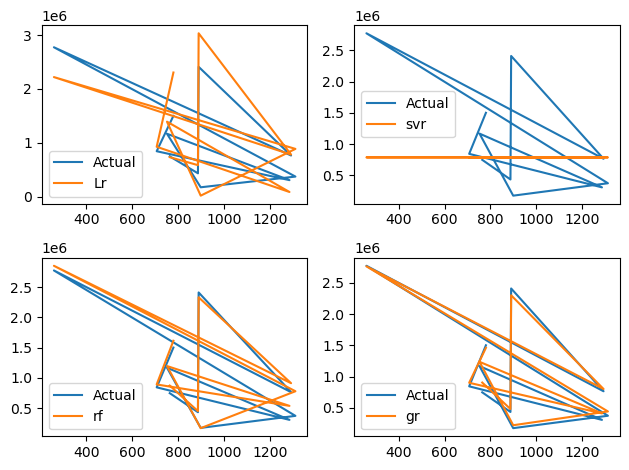

In [25]:
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['Lr'].iloc[0:11],label="Lr")
plt.legend()

plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['svm'].iloc[0:11],label="svr")
plt.legend()

plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['rf'].iloc[0:11],label="rf")
plt.legend()

plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['gr'].iloc[0:11],label="gr")

plt.tight_layout()

plt.legend()

In [26]:
from sklearn import metrics

In [27]:
score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)
score3 = metrics.r2_score(y_test,y_pred3)
score4 = metrics.r2_score(y_test,y_pred4)
print(score1,score2,score3,score4)

0.7833463107364538 -0.07412616242391001 0.8665165019963985 0.8779936181637191


In [28]:
data = {'age' : 19,
        'sex' : 0,
        'bmi' : 27.9,
        'children' : 0,
        'smoker' : 1,
        'region' : 1}

In [29]:
df = pd.DataFrame(data,index=[0])
df

,age,sex,bmi,children,smoker,region
0,19,0,27.90,0,1,1


In [30]:
new_pred = gr.predict(df)
print("Medical Insurance cost for New Customer is : ",new_pred[0])

Medical Insurance cost for New Customer is :  1462896.5618314943


In [31]:
import pickle
# Creating a pickle file 
pickle.dump(gr, open('insurance_prediction.pkl', 'wb'))